In [2]:
import seaborn as sns
import pandas as pd

In [139]:
df = pd.read_excel("C:/Users/USER/Desktop/kny/유사도 측정/요인분석, 주성분분석/통계분석_데이터_임베딩진행완료_231107.xlsx")

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   플랫폼            4139 non-null   int64  
 1   검색어(뉴스,증권뉴스등)  4139 non-null   int64  
 2   게시물제목          4139 non-null   float64
 3   게시물등록일         4139 non-null   int64  
 4   게시물내용          4139 non-null   float64
 5   언론사명           4139 non-null   int64  
 6   뉴스제목           4139 non-null   float64
 7   뉴스내용_불용어제거     4139 non-null   float64
 8   유사도_불용어제거      4139 non-null   float64
 9   similarity     4139 non-null   bool   
dtypes: bool(1), float64(5), int64(4)
memory usage: 295.2 KB


### 변수간 관계 알아보기

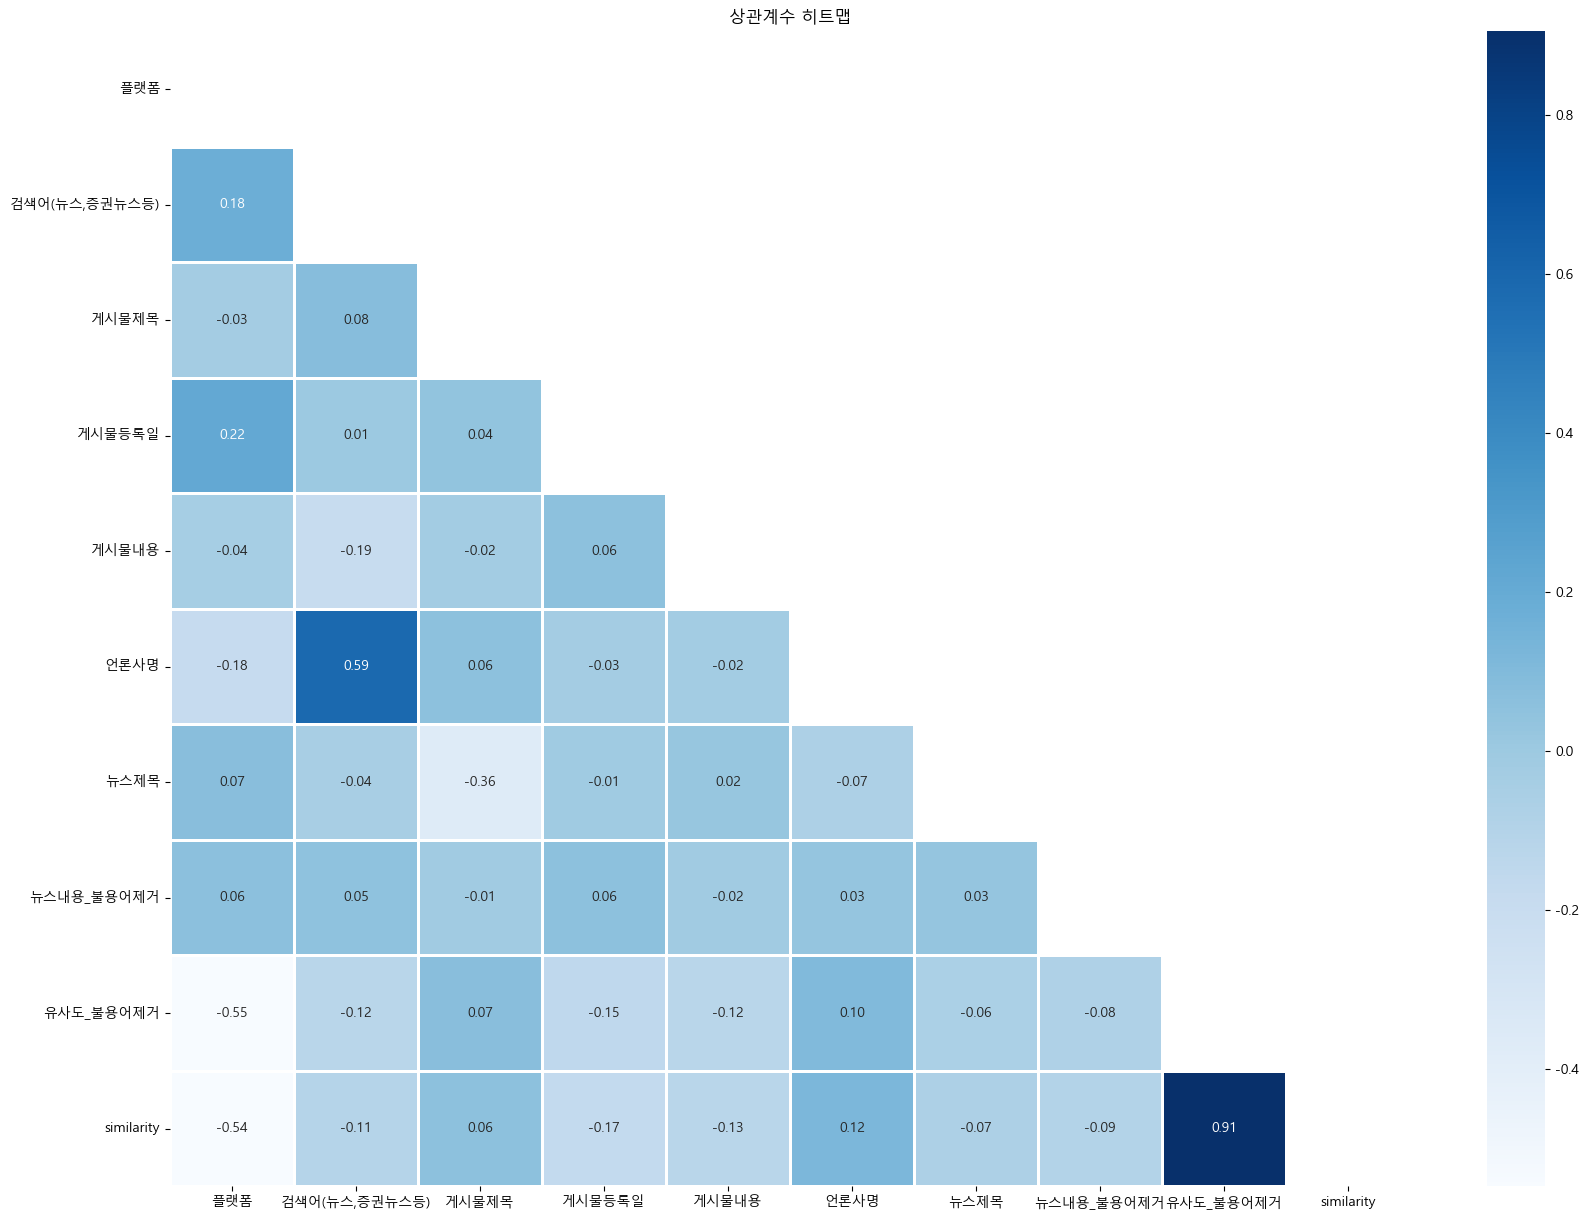

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize = (20,15))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr, annot = True, mask=mask, fmt = '.2f', linewidths = 1., cmap = 'Blues')
plt.title('상관계수 히트맵')
plt.show()

### 주성분분석 (PCA)

In [142]:
from sklearn.preprocessing import StandardScaler

features = ['플랫폼', '검색어(뉴스,증권뉴스등)', '게시물제목', '게시물등록일', '게시물내용', '언론사명', '뉴스제목', '뉴스내용_불용어제거', '유사도_불용어제거']

In [143]:
# Separating out the features
x = df.loc[:, features].values

In [144]:
# Separating out the target
y = df.loc[:, ['similarity']].values

In [145]:
x = StandardScaler().fit_transform(x)

In [146]:
pd.DataFrame(x, columns=features).head()

,플랫폼,"검색어(뉴스,증권뉴스등)",게시물제목,게시물등록일,게시물내용,언론사명,뉴스제목,뉴스내용_불용어제거,유사도_불용어제거
0,2.175268,0.669272,1.188131,1.527125,-0.100612,1.117720,-0.622093,-0.089616,-0.359849
1,2.175268,-0.541484,2.496827,-0.163289,-0.546240,-0.781297,-1.054055,0.443032,-0.769628
2,2.175268,-0.541484,1.071167,1.544588,0.131510,-0.781297,-0.567525,0.756384,-0.763343
3,2.175268,-0.541484,-0.860429,0.839085,-0.365067,-0.781297,2.253738,-1.264566,-0.482084
4,2.175268,1.817938,0.237921,1.537603,0.338756,2.257130,0.429254,-0.289069,-0.768677


In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,1.138145,2.179608
1,1.173465,0.678687
2,2.209370,0.433796
3,2.598327,-0.692424
4,1.429102,3.212021


In [104]:
print(pca.explained_variance_ratio_)

[0.19674263 0.18496796]


In [14]:
import platform
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

Text(0, 0.5, 'principle comp')

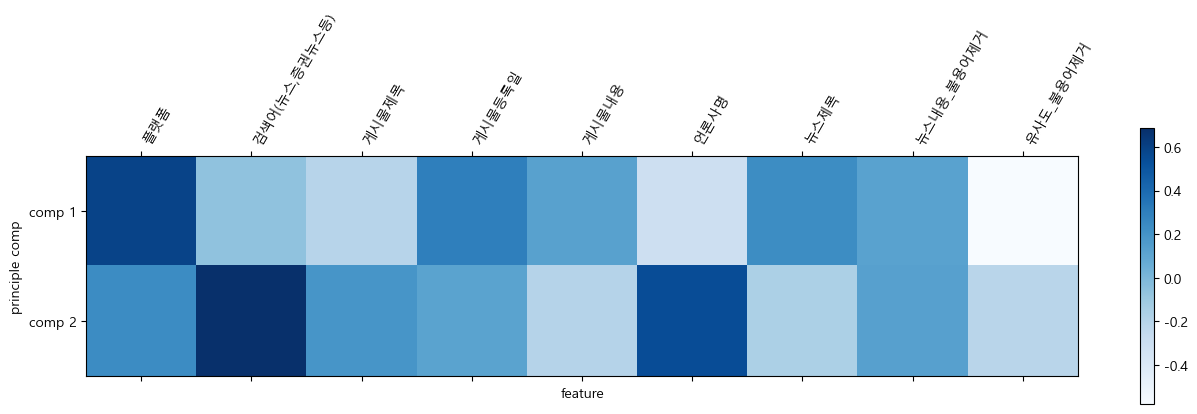

In [127]:
from matplotlib import pyplot as plt

plt.matshow(pca.components_, cmap = 'Blues')
plt.yticks([0, 1], ['comp 1', 'comp 2'])
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=60, ha='left')
plt.xlabel('feature')
plt.ylabel('principle comp')

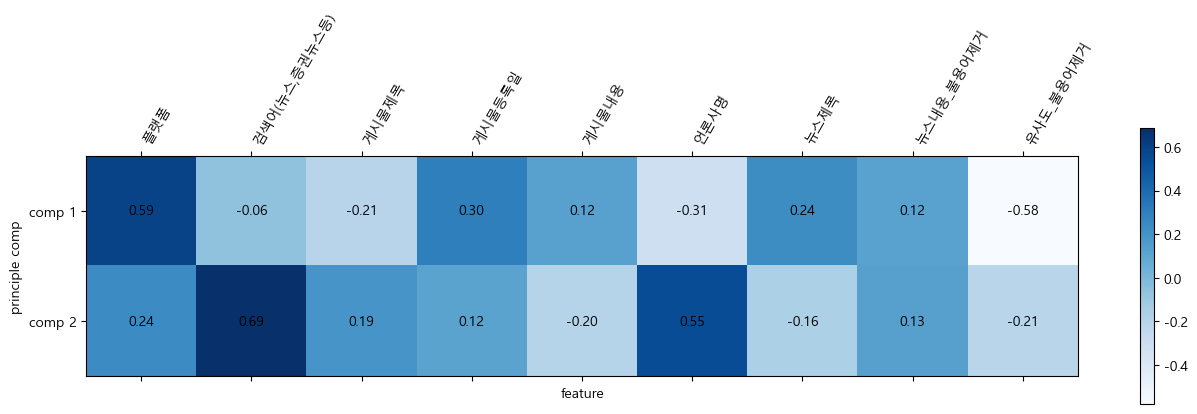

In [133]:
plt.matshow(pca.components_, cmap='Blues')
for (i, j), z in np.ndenumerate(pca.components_):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks([0, 1], ['comp 1', 'comp 2'])
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=60, ha='left')
plt.xlabel('feature')
plt.ylabel('principle comp')
plt.show()

In [148]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf.head()

,principal component 1,principal component 2,principal component 3
0,1.138145,2.179608,-1.396007
1,1.173465,0.678687,-2.726633
2,2.209370,0.433796,-1.993591
3,2.598327,-0.692424,1.150316
4,1.429102,3.212021,0.270291


In [149]:
print(pca.explained_variance_ratio_)

[0.19674263 0.18496796 0.14562246]


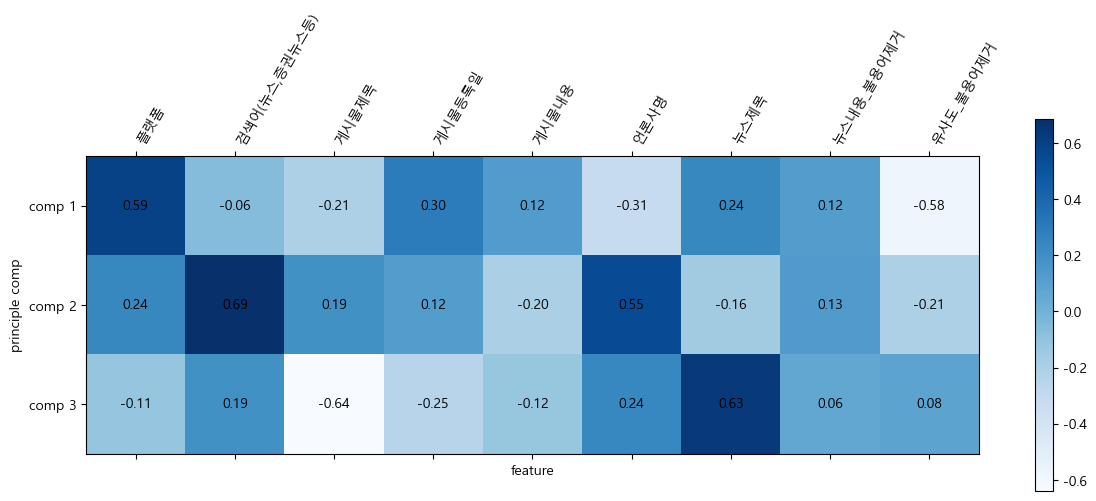

In [151]:
plt.matshow(pca.components_, cmap='Blues')
for (i, j), z in np.ndenumerate(pca.components_):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks([0, 1, 2], ['comp 1', 'comp 2', 'comp 3'])
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=60, ha='left')
plt.xlabel('feature')
plt.ylabel('principle comp')
plt.show()

### 요인분석

In [3]:
import seaborn as sns
import pandas as pd

In [4]:
df3 = pd.read_excel("C:/Users/USER/Desktop/kny/유사도 측정/Untitled Folder/데이터임베딩완료_분석데이터_필요없는열삭제_231107_김나영.xlsx")

In [5]:
from sklearn.preprocessing import StandardScaler

features = ['플랫폼', '검색어(뉴스,증권뉴스등)', '게시물제목', '게시물등록일', '게시물내용', '언론사명', '뉴스제목', '뉴스내용_불용어제거', '유사도_불용어제거']

In [6]:
# Separating out the features
x = df3.loc[:, features].values

In [7]:
# Separating out the target
y = df3.loc[:, ['similarity']].values

In [8]:
x_transformed = StandardScaler().fit_transform(x)
x_transformed.shape

(4139, 9)

In [9]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=2, method='ml', rotation=None)

fa.fit(x)

FactorAnalyzer(method='ml', n_factors=2, rotation=None, rotation_kwargs={})

In [10]:
efa_result = pd.DataFrame(fa.loadings_, index=features)
print(efa_result)

                      0         1
플랫폼            0.181802  0.895654
검색어(뉴스,증권뉴스등)  0.997490 -0.003813
게시물제목          0.078122 -0.061475
게시물등록일         0.007146  0.238060
게시물내용         -0.192792  0.016274
언론사명           0.585830 -0.319373
뉴스제목          -0.042511  0.097776
뉴스내용_불용어제거     0.052401  0.064512
유사도_불용어제거     -0.127373 -0.586223


In [11]:
efa_result

,0,1
플랫폼,0.181802,0.895654
"검색어(뉴스,증권뉴스등)",0.997490,-0.003813
게시물제목,0.078122,-0.061475
게시물등록일,0.007146,0.238060
게시물내용,-0.192792,0.016274
언론사명,0.585830,-0.319373
뉴스제목,-0.042511,0.097776
뉴스내용_불용어제거,0.052401,0.064512
유사도_불용어제거,-0.127373,-0.586223


<Axes: >

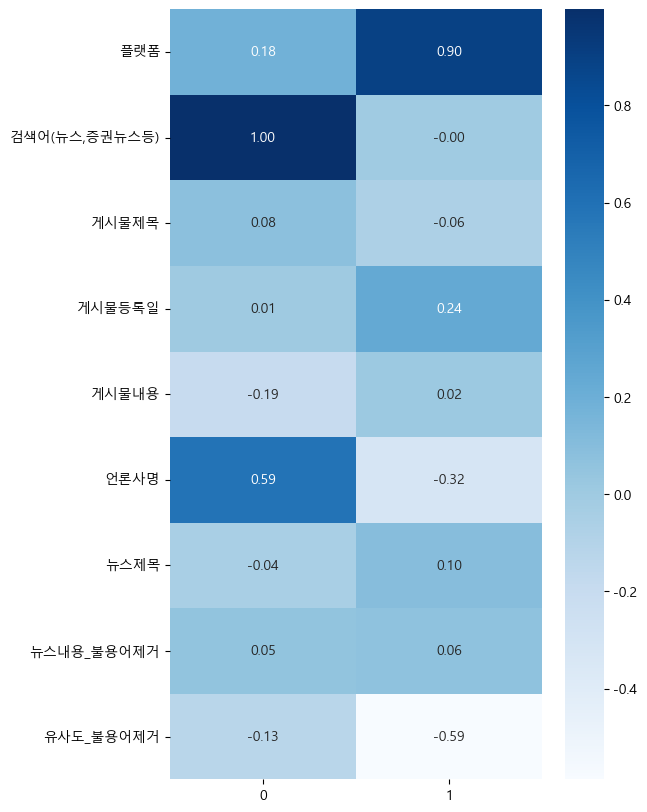

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap='Blues', annot=True, fmt = '.2f')

In [16]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=3, method='ml', rotation=None)

fa.fit(x)

FactorAnalyzer(method='ml', rotation=None, rotation_kwargs={})

In [17]:
efa_result = pd.DataFrame(fa.loadings_, index=features)
print(efa_result)

                      0         1         2
플랫폼            0.182928  0.890932 -0.198817
검색어(뉴스,증권뉴스등)  0.997477 -0.005720 -0.002823
게시물제목          0.081853  0.158283  0.933301
게시물등록일         0.007587  0.242226  0.001140
게시물내용         -0.192820  0.010541 -0.008851
언론사명           0.585464 -0.309785  0.062797
뉴스제목          -0.043808  0.006393 -0.386079
뉴스내용_불용어제거     0.052399  0.056618 -0.030229
유사도_불용어제거     -0.127746 -0.547971  0.183141


In [18]:
efa_result

,0,1,2
플랫폼,0.182928,0.890932,-0.198817
"검색어(뉴스,증권뉴스등)",0.997477,-0.005720,-0.002823
게시물제목,0.081853,0.158283,0.933301
게시물등록일,0.007587,0.242226,0.001140
게시물내용,-0.192820,0.010541,-0.008851
언론사명,0.585464,-0.309785,0.062797
뉴스제목,-0.043808,0.006393,-0.386079
뉴스내용_불용어제거,0.052399,0.056618,-0.030229
유사도_불용어제거,-0.127746,-0.547971,0.183141


<Axes: >

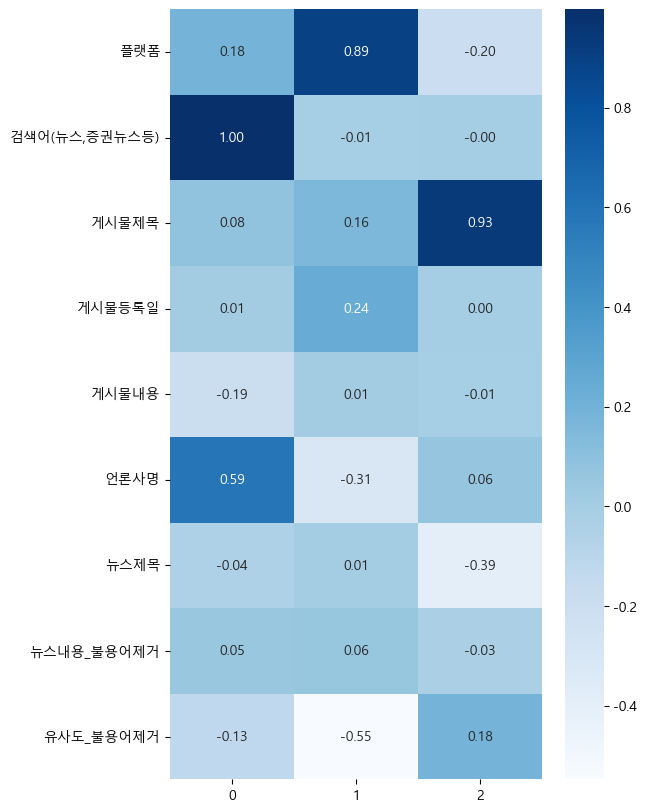

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,10))

sns.heatmap(efa_result, cmap='Blues', annot=True, fmt = '.2f')

### 군집분석

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
df3 = pd.read_excel("C:/Users/USER/Desktop/kny/유사도 측정/Untitled Folder/데이터임베딩완료_분석데이터_231107_김나영.xlsx")

In [123]:
# Separating out the features
x = df3.loc[:, features].values

In [124]:
# Separating out the target
y = df3.loc[:, ['similarity']].values

In [116]:
#x = StandardScaler().fit_transform(x)

In [125]:
from sklearn.cluster import KMeans

model = KMeans(3)
model.fit(x)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

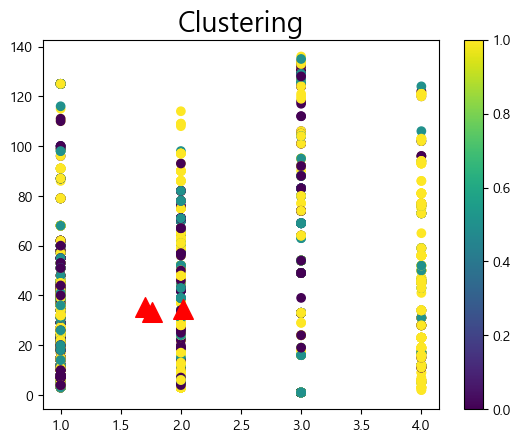

In [126]:
plt.title('Clustering', fontsize=20)
plt.scatter(x[:, 0], x[:, 1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0],
           model.cluster_centers_[:,1], marker='^', c='r', s=200)
plt.colorbar()